             ID  YEAR  MONTH  GRP1  GRP2  GRP3  GRP4  GRP5  GRP6  GRP7  ...  \
0  110000085731  2020      1     0     0     0     0     0     3     0  ...   
1  110000085731  2020      2     0     0     0     0     0     1     0  ...   
2  110000085731  2020      3     0     0     0     0     0     0     0  ...   
3  110000085731  2020      4     0     0     0     0     0     0     0  ...   
4  110000085731  2020      5     0     0     0     0     0     0     0  ...   

   GRP181  GRP182  GRP183  GRP184  GRP185  GRP186  GRP187  GRP188  GRP189  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   target  
0   17615  
1   21066  
2   47915  
3   88492  
4 

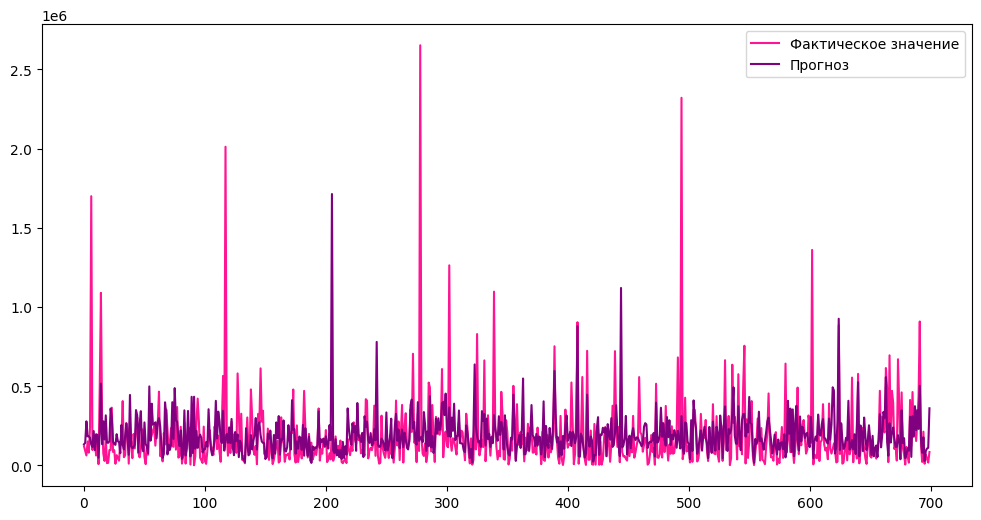

MAPE: 9.406824064633216


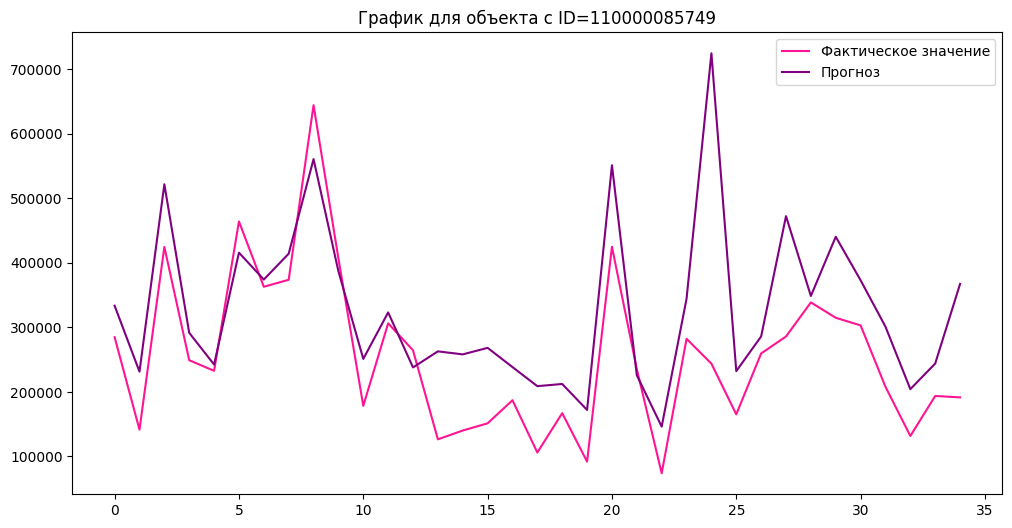

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt


data = pd.read_csv('1_train.csv')

print(data.head())
print(data.describe())

X = data.drop(['target'], axis=1)
y = data['target']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_val)

mape = mean_absolute_percentage_error(y_val, predictions)

plt.figure(figsize=(12, 6))
plt.plot(y_val.values, label='Фактическое значение', color='deeppink')
plt.plot(predictions, label='Прогноз', color='purple')
plt.legend()
plt.show()

print(f'MAPE: {mape}')

model_full = RandomForestRegressor()
model_full.fit(X, y)


def plot_data_by_id(data, id):
    plt.figure(figsize=(12, 6))
    data_id = data[data['ID'] == id]
    plt.plot(data_id['target'].values, label='Фактическое значение', color='deeppink')
    predictions_id = model_full.predict(data_id.drop(columns=['target']))
    plt.plot(predictions_id, label='Прогноз', color='purple')
    plt.legend()
    plt.title(f'График для объекта с ID={id}')
    plt.show()


plot_data_by_id(data, 110000085749)
